# Introduction

J'ai décidé de reprendre le TP fait en R avec les arbres de décisions avec la méthode CART. 

# 1. Installer library

Il est possible d'utiliser la bibliothèque libre de Python : Scikit-learn. Cette bibliothèque permet de faire de la classification, partionnement des données, de la régression et autres. Elle permet notamment de faire des arbres de décision. 

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DecisionTreeClassifier permet de créer notre modèle et, plot_tree permet d'afficher l'abre de décision.

# 2. Charger données Titanic

Contrairement à R, les donneés du Titanic ne sont pas disponibles dans une librairie de Python. J'ai donc récupéré les données sur Kaggle et le séparateur de ce fichier csv est ";". 

In [2]:
import pandas as pd

df = pd.read_csv("titanic-passengers.csv", sep = ";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,S
...,...,...,...,...,...,...,...,...,...
886,779,No,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,Q
887,435,No,1,"Silvey, Mr. William Baird",male,50.0,1,0,S
888,342,Yes,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,S
889,633,Yes,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,C


Ce jeu de données contient 891 observations et chacune est composé de 6 variables : 
- PassengerId : ID du passager [de 1 à 891]
- Survived : si le passager a survis ou non [Yes/No]
- Pclass : classe du passager [de 1 à 891]
- Name : nom du passager [de 1 à 3]
- Sex : sexe du passager [Male/Female]
- Age : âge du passager [de 0.42 à 80]
- SibSp : nombre de frères et soeurs ou conjoints à bord [de 0 à 8]
- Parch : nombre de parents ou d'enfants à bord [de 0 à 6]
- Embarked : où le passager a embarqué [S/Q/C - première lettre de 3 différentes villes]

In [3]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


La fonction <em>describe</em> de Python nous permet de voir les paramètres statistiques de nos variables quantitatives. 

# 3. Variable "Survived"

Nous allons nous intéresser à la variable survived du jeu de données. 

array([<AxesSubplot: ylabel='Répartition des passagers selon leur survie (en %)'>],
      dtype=object)

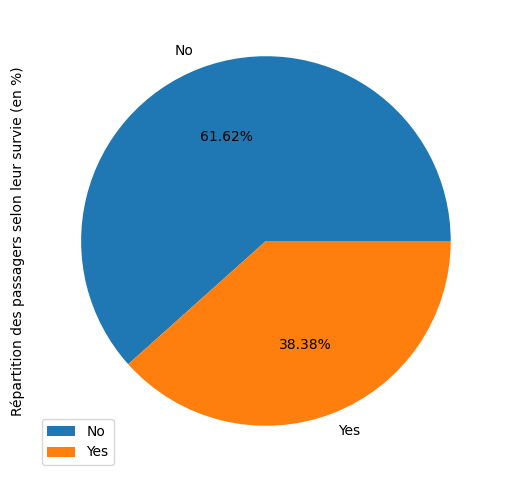

In [4]:
# crosstab : construit le tableau de contigence de notre variable survived 
Su2 = pd.crosstab(df.Survived, 
                  "Répartition des passagers selon leur survie (en %)")
# affiche dans un graphique de camembert (plot.pie) nos données 
Su2.plot.pie(subplots=True, 
             # taille du graphique
             figsize = (6, 6), 
             # affiche leur label (autopct) 
             # arrondi de nos données à 2 deux chiffres après la virgule 
             autopct = lambda x: str(round(x, 2)) + '%')

Quel est le type de la variable survived ?

In [5]:
# demande le type de notre 1er données 
type(df.Survived[0]) 

str

Les données contiennent-elles des valeurs manquantes ?

In [6]:
# is.na() retourne true ou false pour chaque ligne de notre colonne survived 
# en fonction de si y a donnée manquante ou non 
# .sum() la somme des false 
df.Survived.isna().sum()

0

Nous remarquons, que les variables sont des chaînes de charactères et qu'il n'y a aucune valeur manquante. De plus, il y a plus de mort que de survivant à la suite de ce voyage. 

# 4. Estimer un arbre de décision

Avant de commencer, nous vérifions qu'il n'y a aucune variable manquante car il n'est pas possible de faire des prédictions lorsqu'il y a des valeurs manquantes.

In [7]:
# is.null() retourne true ou false pour chaque ligne de notre colonne survived 
# en fonction de si y a donnée manquante ou non 
    # équivalent de isna()
# .sum() la somme des false 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64

Dans la variable age, il y a 177 passagers où l'âge n'est pas indiqué. De ce fait, nous allons supprimer ses lignes.

In [8]:
#dropna() : supprime les lignes contenant au moins 1 donnée manquante
df_drop = df.dropna()

De plus, d'après la documentation, notre X (nos observations) doit contenir que des variables quantitatives car il est préférable d'avoir une matrice (np.array) en entrée de notre modèle. 

De ce fait, quand le passager est une femme, il sera indiqué 0 dans sa cellule, et si c'est un homme, il sera indiqué 1.

Et, lorsque le passager a embarqué à Cherbourg(C), il sera indiqué 0, si il a embarqué à Queenstown (Q) il sera indiqué 1 et si c'était à Southampton (S) il sera indiqué 2.

In [9]:
# copie toutes les données entière pour éviter des warnings 
# lors du changement de valeurs dans certaines colonnes
df_drop = df_drop.copy(deep=True) 
# replace nos variables qualitatives en quantitatives 
    # female devient 0 et male 1
df_drop['Sex'].replace(['female','male'], [0,1], inplace=True)
    # C devient 0, Q devient 2 et S devient 2
df_drop['Embarked'].replace(['C','Q', 'S'], [0,1,2], inplace=True)

# ne prends les variables quantitatives du jeu de données
data = df_drop[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]]

# afficher le début de notre jeu de données : 
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,2,1,28.0,0,0,2
1,3,1,25.0,0,0,2
2,3,1,20.0,0,0,2
3,3,0,29.0,0,4,2
4,1,1,31.0,1,0,2


In [10]:
# transforme le dataframe data en np.array 
x = data.values
x

array([[ 2.,  1., 28.,  0.,  0.,  2.],
       [ 3.,  1., 25.,  0.,  0.,  2.],
       [ 3.,  1., 20.,  0.,  0.,  2.],
       ...,
       [ 1.,  0., 24.,  3.,  2.,  2.],
       [ 1.,  1., 32.,  0.,  0.,  0.],
       [ 1.,  1., 47.,  0.,  0.,  2.]])

Concernant notre variable "cible", c'est-à-dire celle qui contient les classes que nous cherchons à prédire, en entrée elle peut être une variable quantitative ou qualitative, il n'y a pas de grande importance. Pour la lecture, il est préférable de laisser la variable tel quel. 

In [11]:
# mets dans y notre variable cible : survived
y = df_drop['Survived']
y

0       No
1       No
2       No
3       No
4       No
      ... 
884     No
887     No
888    Yes
889    Yes
890     No
Name: Survived, Length: 714, dtype: object

Ainsi, nous pouvons enfin lancer notre modèle. 

In [12]:
# création du modèle 
    # paramètres par défaut : 
        # criterion='gini': fonction gini mesure la qualité de la séparation 
        # splitter='best': stratégie utilisé pour séparer des noeuds 
        # (choisit le meilleur)
    # max_depht = 3: profondeur du noeud (ici 3)
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x, y)

Nous pouvons afficher l'arbre de décision en utilisant "plot_tree": 

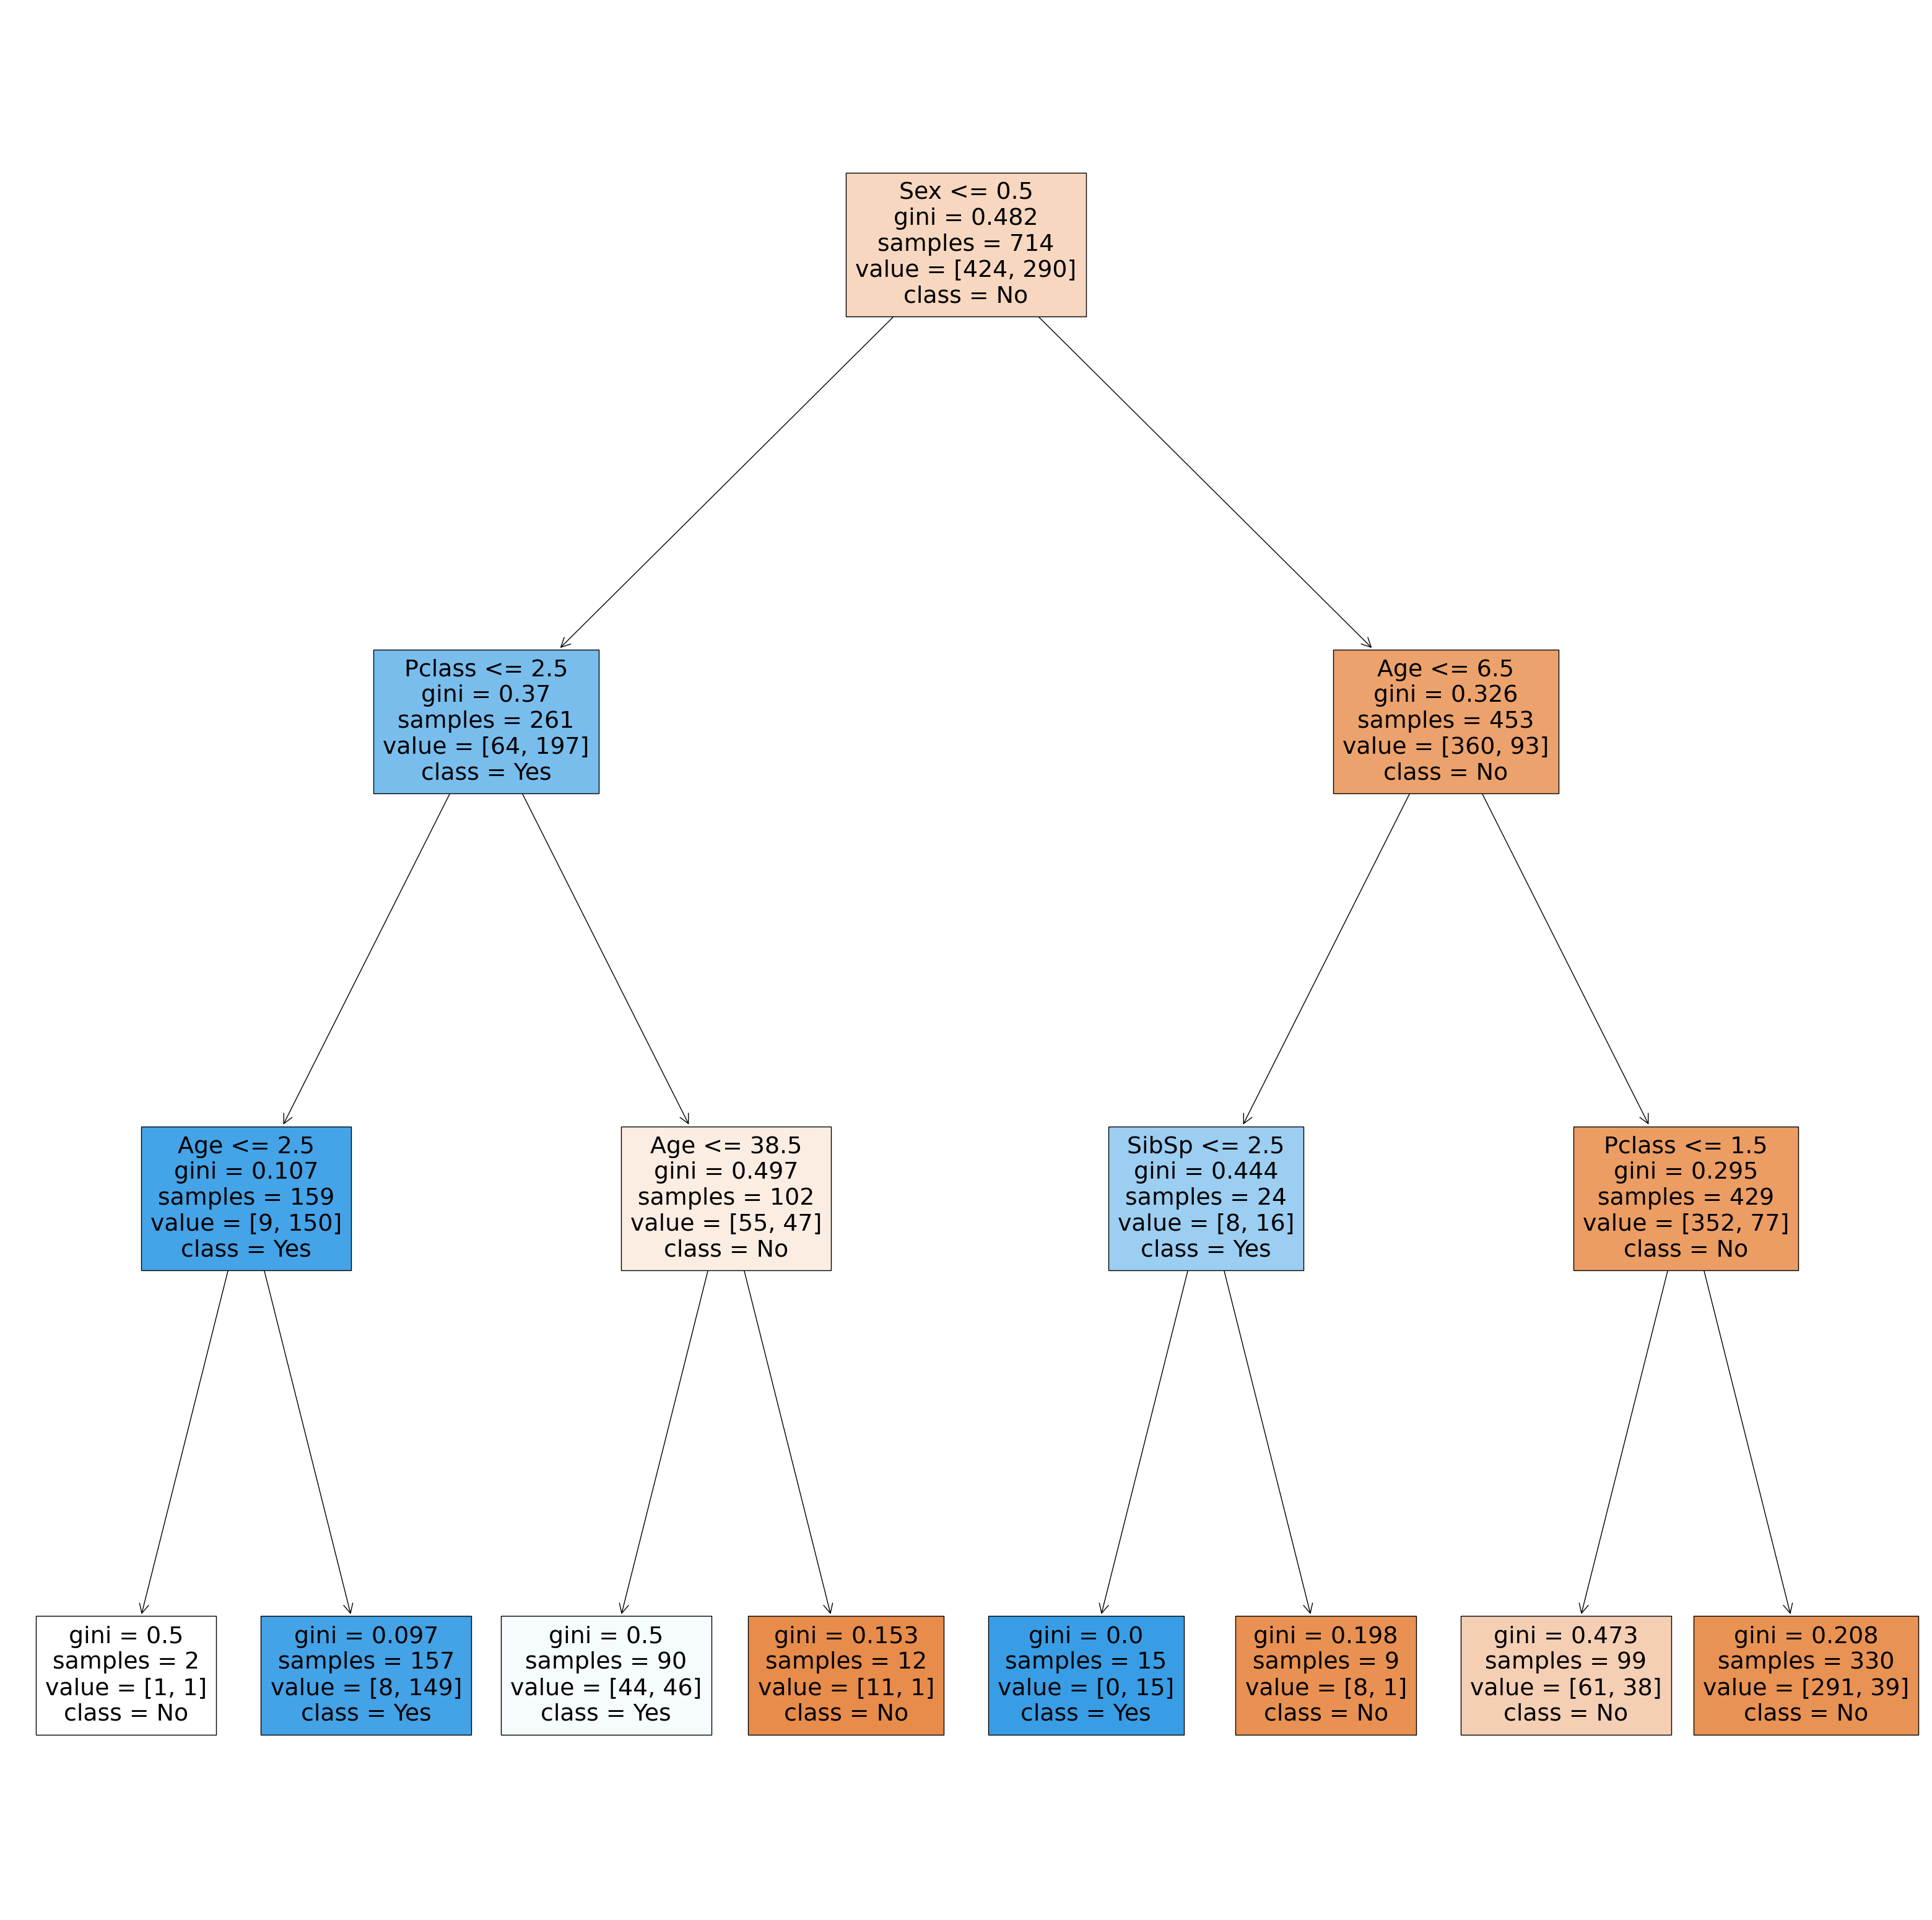

In [13]:
import matplotlib.pyplot as plt 
# initialise la taille du graphique 
plt.figure(figsize=(40,40))
# demande d'afficher un graphique d'arbre de décision
    # donne en paramètres le nom de nos colonnes 
    # et pour la prédiction, le nom des deux classes qu'on peut prédire
plot_tree(clf, feature_names=data.columns.values, class_names=["No","Yes"],
          filled=True)
# affiche le graphique
plt.show()

Cet arbre fonctionne avec l'indice de diversité de Gini. Il mesure avec quelle fréquence un élément aléatoire de l'ensemble serait mal classé si son étiquette était choisie aléatoirement selon la distribution des étiquettes dans le sous-ensemble.  

Pour la première branche, il est dit que si le passager est une femme, il faut aller vers le 2ème étage à gauche (bleu) et si c'est un homme vers la case de droite. Puis, pour la première cellule, il faut regarquer le numéro de la classe du passager (femme) et pour la seconde l'âge du passager (homme). Et ainsi de suite. 

Puis, en exemple, nous allons sélectionner les femmes qui étaient en classe 1 et 2.

In [14]:
# prends de notre jeu de données que les femmes (0) 
# et les classes différentes à la 3
ex = df_drop.loc[(df_drop.Sex == 0) & (df_drop.Pclass != 3)]
ex

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,2
12,755,Yes,2,"Herman, Mrs. Samuel (Jane Laver)",0,48.0,1,2,2
24,273,Yes,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",0,41.0,0,1,2
34,727,Yes,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",0,30.0,3,0,2
39,44,Yes,2,"Laroche, Miss. Simonne Marie Anne Andree",0,3.0,1,2,0
...,...,...,...,...,...,...,...,...,...
853,330,Yes,1,"Hippach, Miss. Jean Gertrude",0,16.0,0,1,0
858,367,Yes,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",0,60.0,1,0,0
865,195,Yes,1,"Brown, Mrs. James Joseph (Margaret Tobin)",0,44.0,0,0,0
882,418,Yes,2,"Silven, Miss. Lyyli Karoliina",0,18.0,0,2,2


Maintenant, nous cherchons la proportion de survivants dans ce nouveau jeu de données. 

La première méthode est de faire un tableau de contingence. 

In [15]:
# crosstab : tableau de contingence 
    # affiche les fréquences 
pd.crosstab(ex.Survived, "freq")
# pd.crosstab(ex.Survived, "freq", normalize = True)

col_0,freq
Survived,
No,9
Yes,150


Ou nous pouvons compter en fonction de la variable 'Survived' pour calculer nous même la proportion.

In [16]:
# grouper par la variable survived & compte combien il y a de lignes 
# pour chaque valeurs [.count()]
# divise par le nombre total de passager dans le dataframe 
# multiplie par 100 pour l'avoir en pourcentage 
ex.groupby(['Survived']).Survived.count()/len(ex)*100

Survived
No      5.660377
Yes    94.339623
Name: Survived, dtype: float64

Dans ce nouveau jeu de données, il y a 94.33% des passagers qui ont survécu. 

# 5. Ajout de nouveau passager

Maintenant, nous allons rajouter un passager; féminin. 

In [17]:
# créer le nouveau passager dans un dataframe 
# que nous transposant pour la lecture 
newp = pd.DataFrame([3,0,19,3,0,0]).T
# on nomme les colonnes avec le nom des colonnes de notre dataframe du début 
newp.columns = data.columns.values

Et nous allons chercher à prédire si cette perssone a survécu ou pas. Nous lançons la prédiction en demandant d'afficher la probabilité d'appartenance aux deux critères. 

In [18]:
# fait la prédiction par probabilité de ce nouveau passager 
# avec le modèle créer juste au-dessus 
y_pred = clf.predict_proba(newp.values)
y_pred

array([[0.48888889, 0.51111111]])

D'après la prédiction, ce passager a 51% de chance de survivre.

Pour visualiser les erreurs, ci dessous une matrice de contingence. 

In [19]:
from  sklearn.metrics import accuracy_score, confusion_matrix

# fais la prédiction par probabilité de ce nouveau passager 
# avec le modèle créer juste au-dessus 
y_pred_all = clf.predict(x)

# avec fonction de la libratrie confusion_matrix : 
# on affiche la matrice de confusion entre nos prédictions 
    # et nos valeurs réelles
confusion_matrix(y,y_pred_all)

array([[372,  52],
       [ 80, 210]], dtype=int64)

Il y a 80 passagers qui ont survécu mais qui ont été prédit mort et 52 personnes qui sont morts et qui ont été prédit comme survivant. 

Visualisation de l'erreur d'apprentissage :

In [20]:
# accuracy_score : calcule la précision du sous-ensemble
# soustrait par 100 pour avoir le taux d'erreur et non de bonne prédiction 
# multiplie par 100 pour l'avoir en pourcentage
100-accuracy_score(y,y_pred_all)*100

18.4873949579832

Il y a environ 18.5% d'erreur dans l'arbre.

# 6. Nouveau arbre de décisions

Ensuite, nous allons séparer le jeu de données en 2 parties. Dans le jeu de données test, il y aura 30% des valeurs totals. Cela nous permettra d'avoir une estimation de la capacité de généralisation de l'arbre. 

In [21]:
from sklearn.model_selection import train_test_split

# train_test_split : sépare nos données 
# test_size : 0.3 soit 30% sera dans le jeu de données test 
# stratifiy = y [survived] : 
# on aura dans chaque jeu de donnée créé la même proportion de No et Yes 
# random_state : 
# initialiser le générateur de nombres aléatoires 
    # (décidera du découpage des données en train et test) 
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3, 
                                                    random_state = 0, 
                                                    stratify=y)
# jeux de données x contiennent les valeurs 
# jeux de données y contiennent les classes (survived)

In [22]:
# lance le modèle de classification avec arbre de décision 
model = DecisionTreeClassifier()
# le lance sur nos données train 
model = model.fit(X_train, y_train)
# fais la prédiction pour nos valeurs de test 
Y_pred = model.predict(X_test)
# matrice de confusion entre nos y prédit pour le jeu de données test 
    # et les réelles valeurs 
confusion_matrix(y_test,Y_pred)

array([[105,  23],
       [ 26,  61]], dtype=int64)

Il y a 27 passagers qui ont survécu mais qui ont été prédit mort et 24 personnes qui sont morts et qui ont été prédit comme survivant.

In [23]:
# accuracy_score : calcule la précision du sous-ensemble
# soustrait par 1 pour avoir le taux d'erreur et non de bonne prédiction 
# multiplie par 100 pour l'avoir en pourcentage
(1-accuracy_score(y_test,Y_pred))*100

22.790697674418603

Il y a environ 23.72% d'erreur dans l'arbre.

# 7. Hyperparamètres

Avec ma méthode CART sur R, parmis les paramètres les plus importants, il y a minsplit et cp. 

Nous pouvons retrouver ces équivalents avec Python. 

En effet, <em>minsplit</em> correspond à <em>min_samples_split</em>. Dans ce paramètre nous indiquant la taille minimal pour segmenter. 

Puis, <em>cp</em> correspond à <em>cc_alpha</em>. C'est un paramètre de complexité qui permet de gagner du temps de calcul en raccourcissant les divisions qui n'en valent pas la peine. En effet, seul le "sous-arbre" avec le plus large coût de complexité qui est plus petit que le paramètre de complexité sera choisit. 

In [24]:
import numpy as np 

minsplit = 10 # on travaille a minsplit constant
mes_cp = np.arange(0,0.101,0.001) # valeurs de cp a essayer

Text(0, 0.5, 'Erreurs de test')

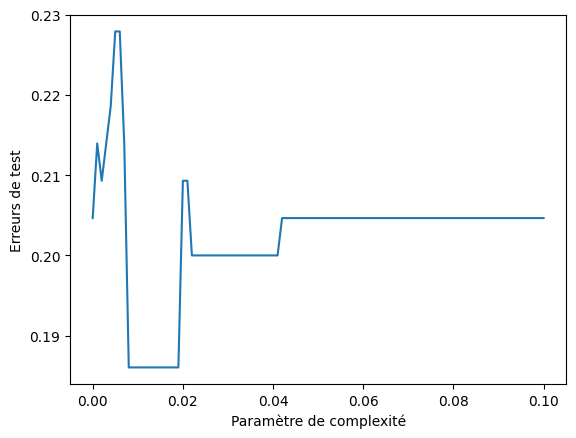

In [25]:
err_app = []

# pour chaque paramtre de complexite
for i in range(len(mes_cp)):
    # on lance le modele avec les deux nouveux parametres
    model = DecisionTreeClassifier(min_samples_split = minsplit, 
                                   ccp_alpha = mes_cp[i])
    model = model.fit(X_train, y_train)
    # fait la prédiction sur nos données tes 
    Y_pred = model.predict(X_test)
    # mets le taux d'érreur dans une liste 
    err_app.append(1-accuracy_score(y_test,Y_pred))
    
# affiche les taux d'erreur pour chaque paramètre de complexité dans un graph  
plt.plot(mes_cp, err_app)
plt.xlabel("Paramètre de complexité")
plt.ylabel("Erreurs de test")

En prenant un minsplit fixe (10), on remarque que l'erreur de test est la plus faible quand cp vaut entre 0.09 et 0.019. Nous avons pu remarqué la même chose avec R. 

# 8. Reproche

Lorsque je sépare le jeu de données, voici la fonction appliquée : 

<em>X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0, stratify=y)</em>

Stratify = y avec y qui représente la variable Survived. On aura dans chaque jeu de donnée créé la même proportion de d'étiquettes que dans l'array y. De ce fait, il y aura le même pourcantage de survivant et de morts répartis dans nos deux nouveaux jeux de données. 

Et random_state correspond à la seed utilisée pour mélanger les données. 

De ce fait, on peut dire que comme on a fixe les donnees, le choix est par rapport à ces commandes. il y a donc un découpage arbitraire.

# 9. Zoo

Une nouvelle fois, les données ne sont accesibles qu'avec une librairie de R. En allant sur le github de ce package, j'ai réussi à récupérer ces données. Cependant, au lieu d'avoir FALSE/TRUE ou des chaînes de charactères, cela est modifié en chiffre (1 pour TRUE par exemple). 

In [26]:
# lit un csv avec comme séparateur ";"
zoo = pd.read_csv("zoo.csv", sep=";")
zoo

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,leggs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [27]:
# extrait toutes nos valeurs dans x sauf celle qu'on cherche à prédire (type)
df_zoo = zoo.iloc[:,1:17]
x = np.array(df_zoo)
# on cherche à prédire la variable type
y = np.array(zoo.type)

In [28]:
# train_test_split : sépare nos données 
# test_size : 0.3 soit 30% sera dans le jeu de données test 
# stratifiy = y [survived] : 
# on aura dans chaque jeu de donnée créé la même proportion pour chaque type
# random_state : 
# initialiser le générateur de nombres aléatoires 
    # (décidera du découpage des données en train et test) 

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y)

On essaie avec minsplit qui vaut 4 car il y a 4 amphibiens et c'est le type avec le moins d'individus.

Text(0, 0.5, 'Erreurs de test')

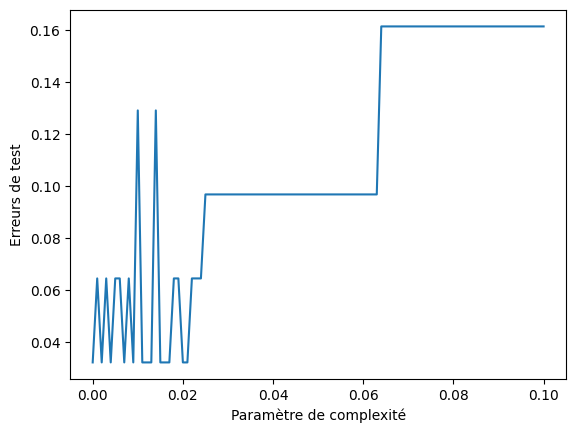

In [29]:
minsplit2 = 4
# valeurs de cp a essayer
mes_cp2 = np.arange(0,0.101,0.001) 
err_app = []

# pour chaque paramtre de complexite
for i in range(len(mes_cp2)):
    # on lance le modele avec les deux nouveux parametres
    model = DecisionTreeClassifier(min_samples_split = minsplit2, 
                                   ccp_alpha = mes_cp2[i])
    model = model.fit(X_train, y_train)
    # fait la prédiction sur nos données tes 
    Y_pred = model.predict(X_test)
    # mets le taux d'érreur dans une liste 
    err_app.append(1-accuracy_score(y_test,Y_pred))
  
    # affiche les taux d'erreur pour chaque paramètre de complexité 
    # dans un graphique  
plt.plot(mes_cp, err_app)
plt.xlabel("Paramètre de complexité")
plt.ylabel("Erreurs de test")

L'idéal serait d'avoir un cp entre 0.002 et 0.02. 

On essaie maintenant avec un minsplit à 7.

Text(0, 0.5, 'Erreurs de test')

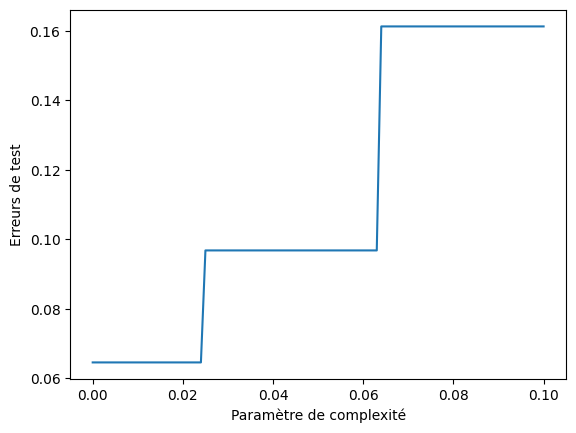

In [30]:
minsplit3 = 7
err_app = []

for i in range(len(mes_cp2)):
    model = DecisionTreeClassifier(min_samples_split = minsplit3, 
                                   ccp_alpha = mes_cp2[i])
    model = model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    err_app.append(1-accuracy_score(y_test,Y_pred))
    
plt.plot(mes_cp, err_app)
plt.xlabel("Paramètre de complexité")
plt.ylabel("Erreurs de test")

Le taux d'erreur est plus grand qu'avec un minsplit à 4 minsplit. Comparons maintenant la cp pour un minsplit qui vaut 4 afin de trouver le meilleur arbre de décision. 

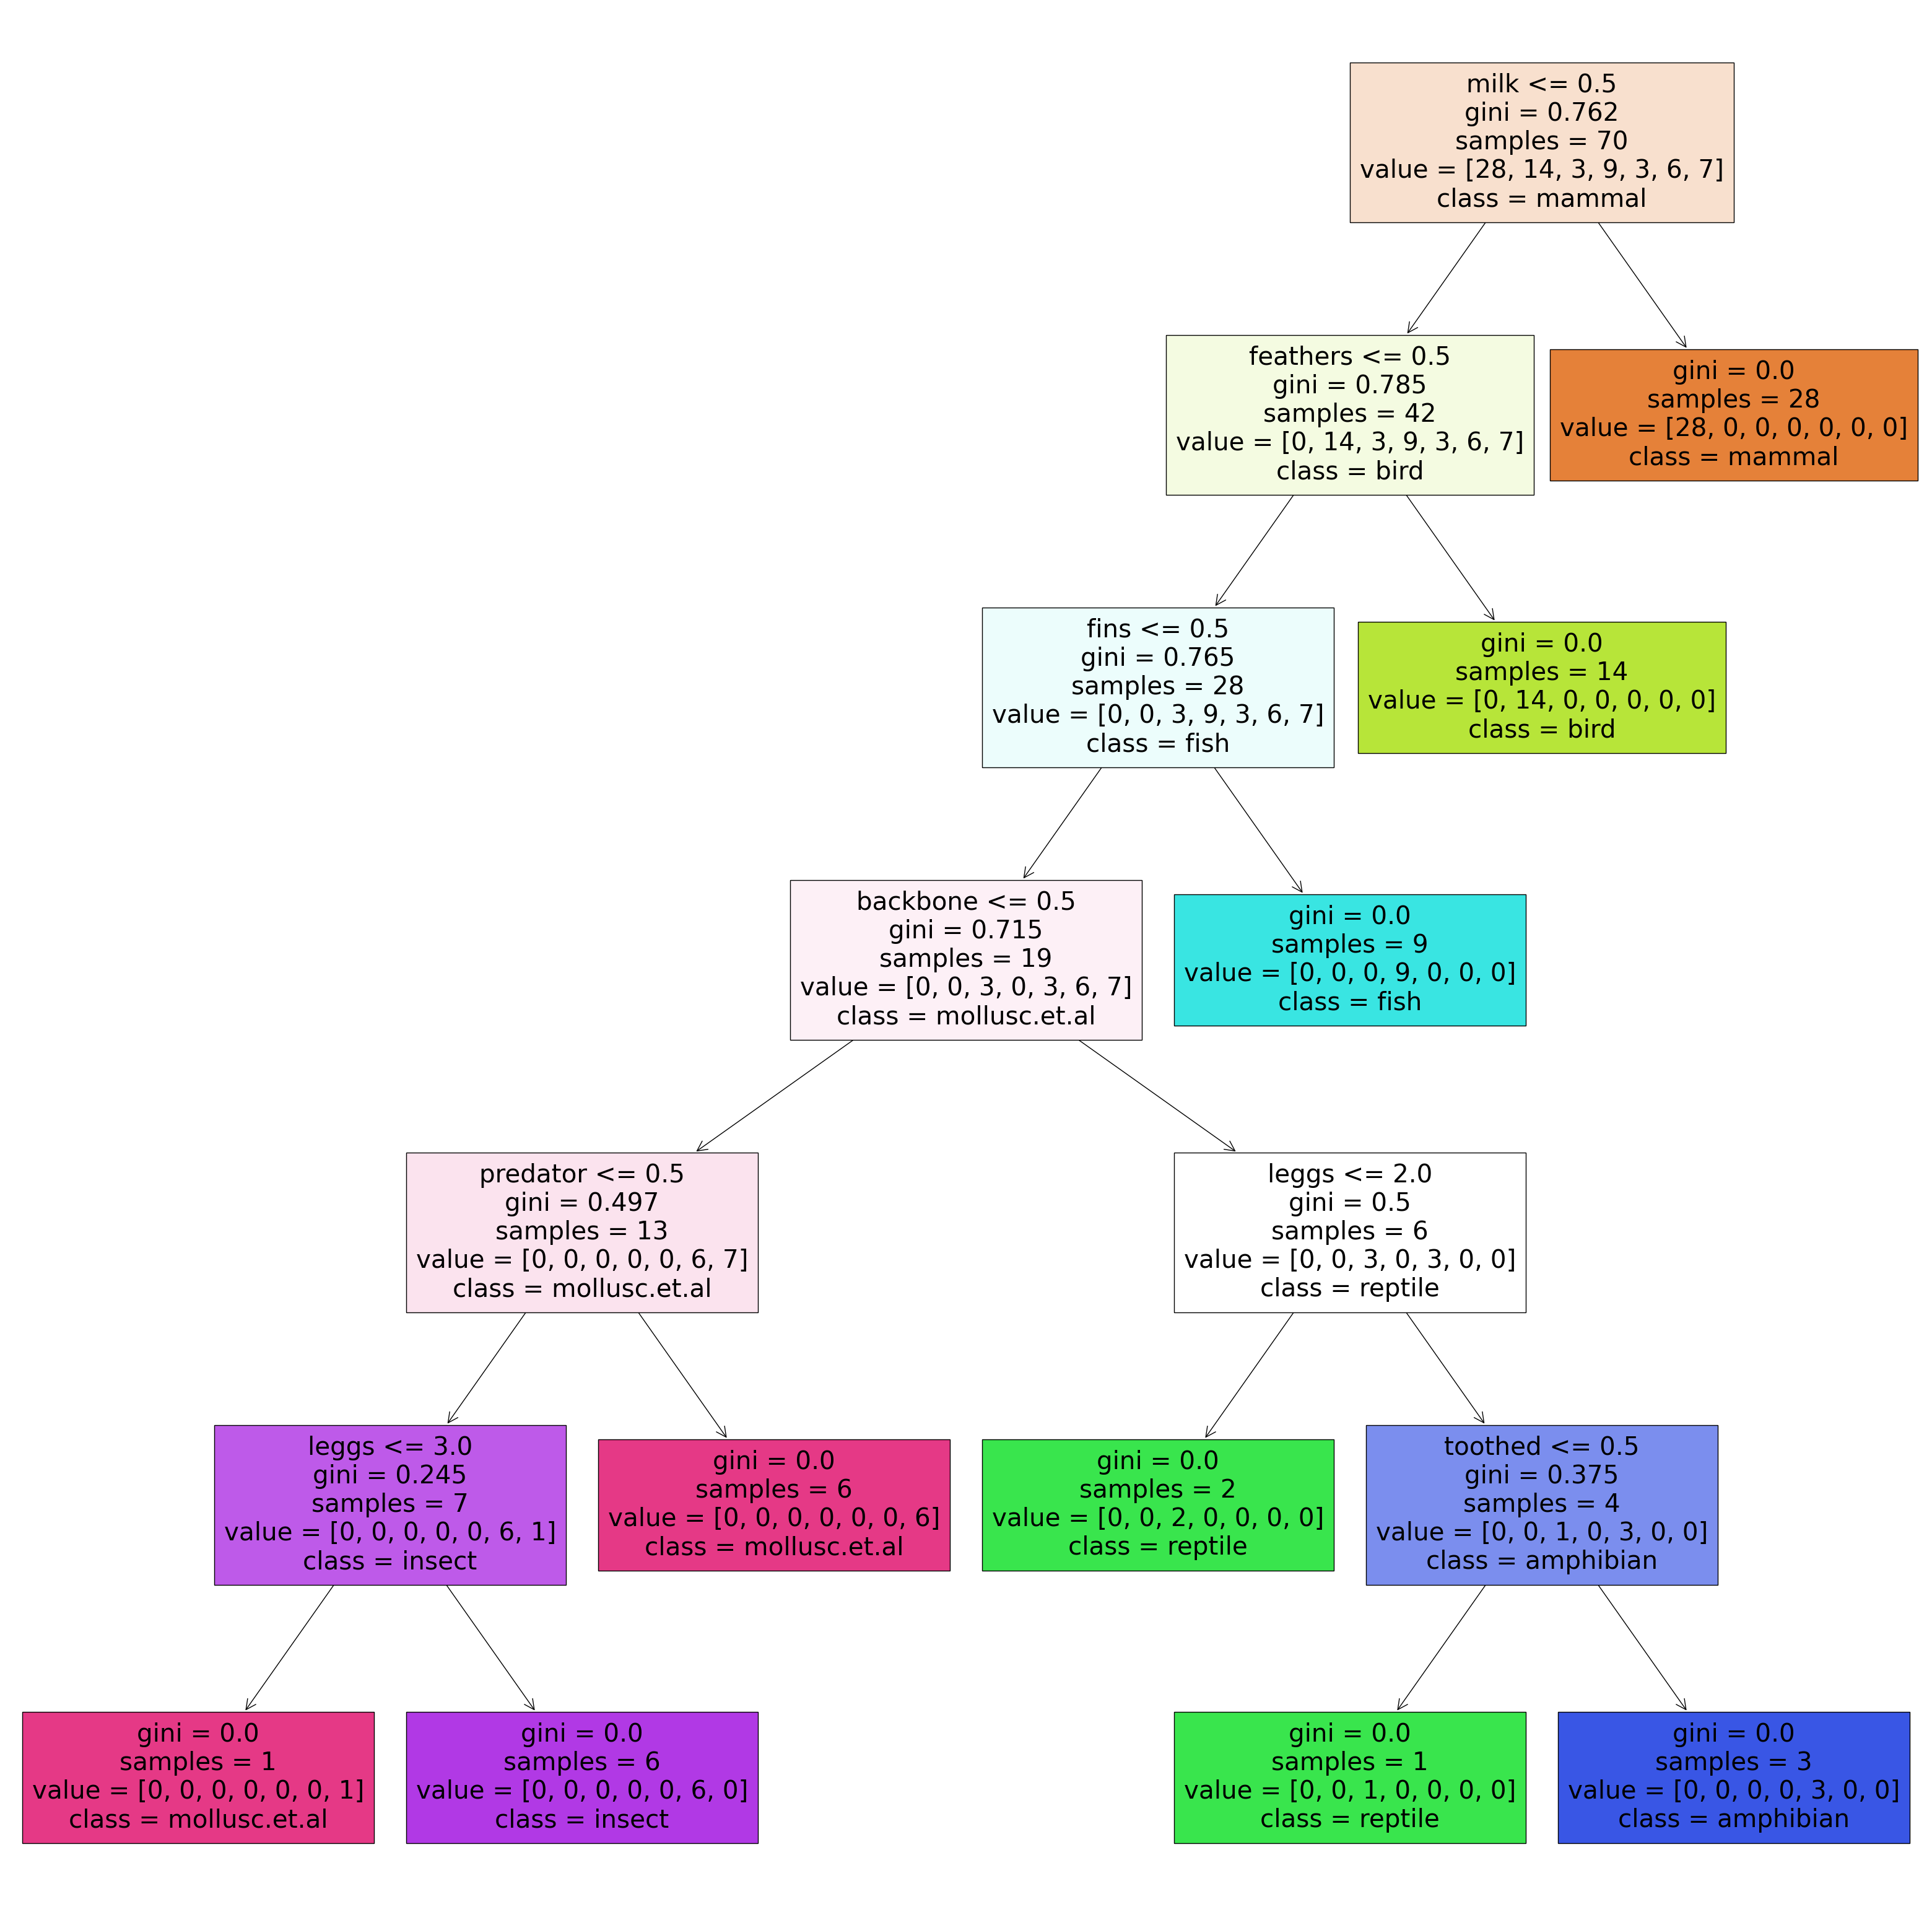

In [31]:
name_classe = ["mammal", "bird", "reptile", "fish", "amphibian", 
               "insect", "mollusc.et.al"]

clf = DecisionTreeClassifier(min_samples_split = minsplit2, ccp_alpha = 0.003)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(40,40))
# demande d'afficher un graphique d'arbre de décision
    # donne en paramètres le nom de nos colonnes et pour la prédiction, 
    # le nom des deux classes qu'on peut prédire
plot_tree(clf, feature_names=df_zoo.columns.values, 
          class_names=name_classe,filled=True)
plt.show()

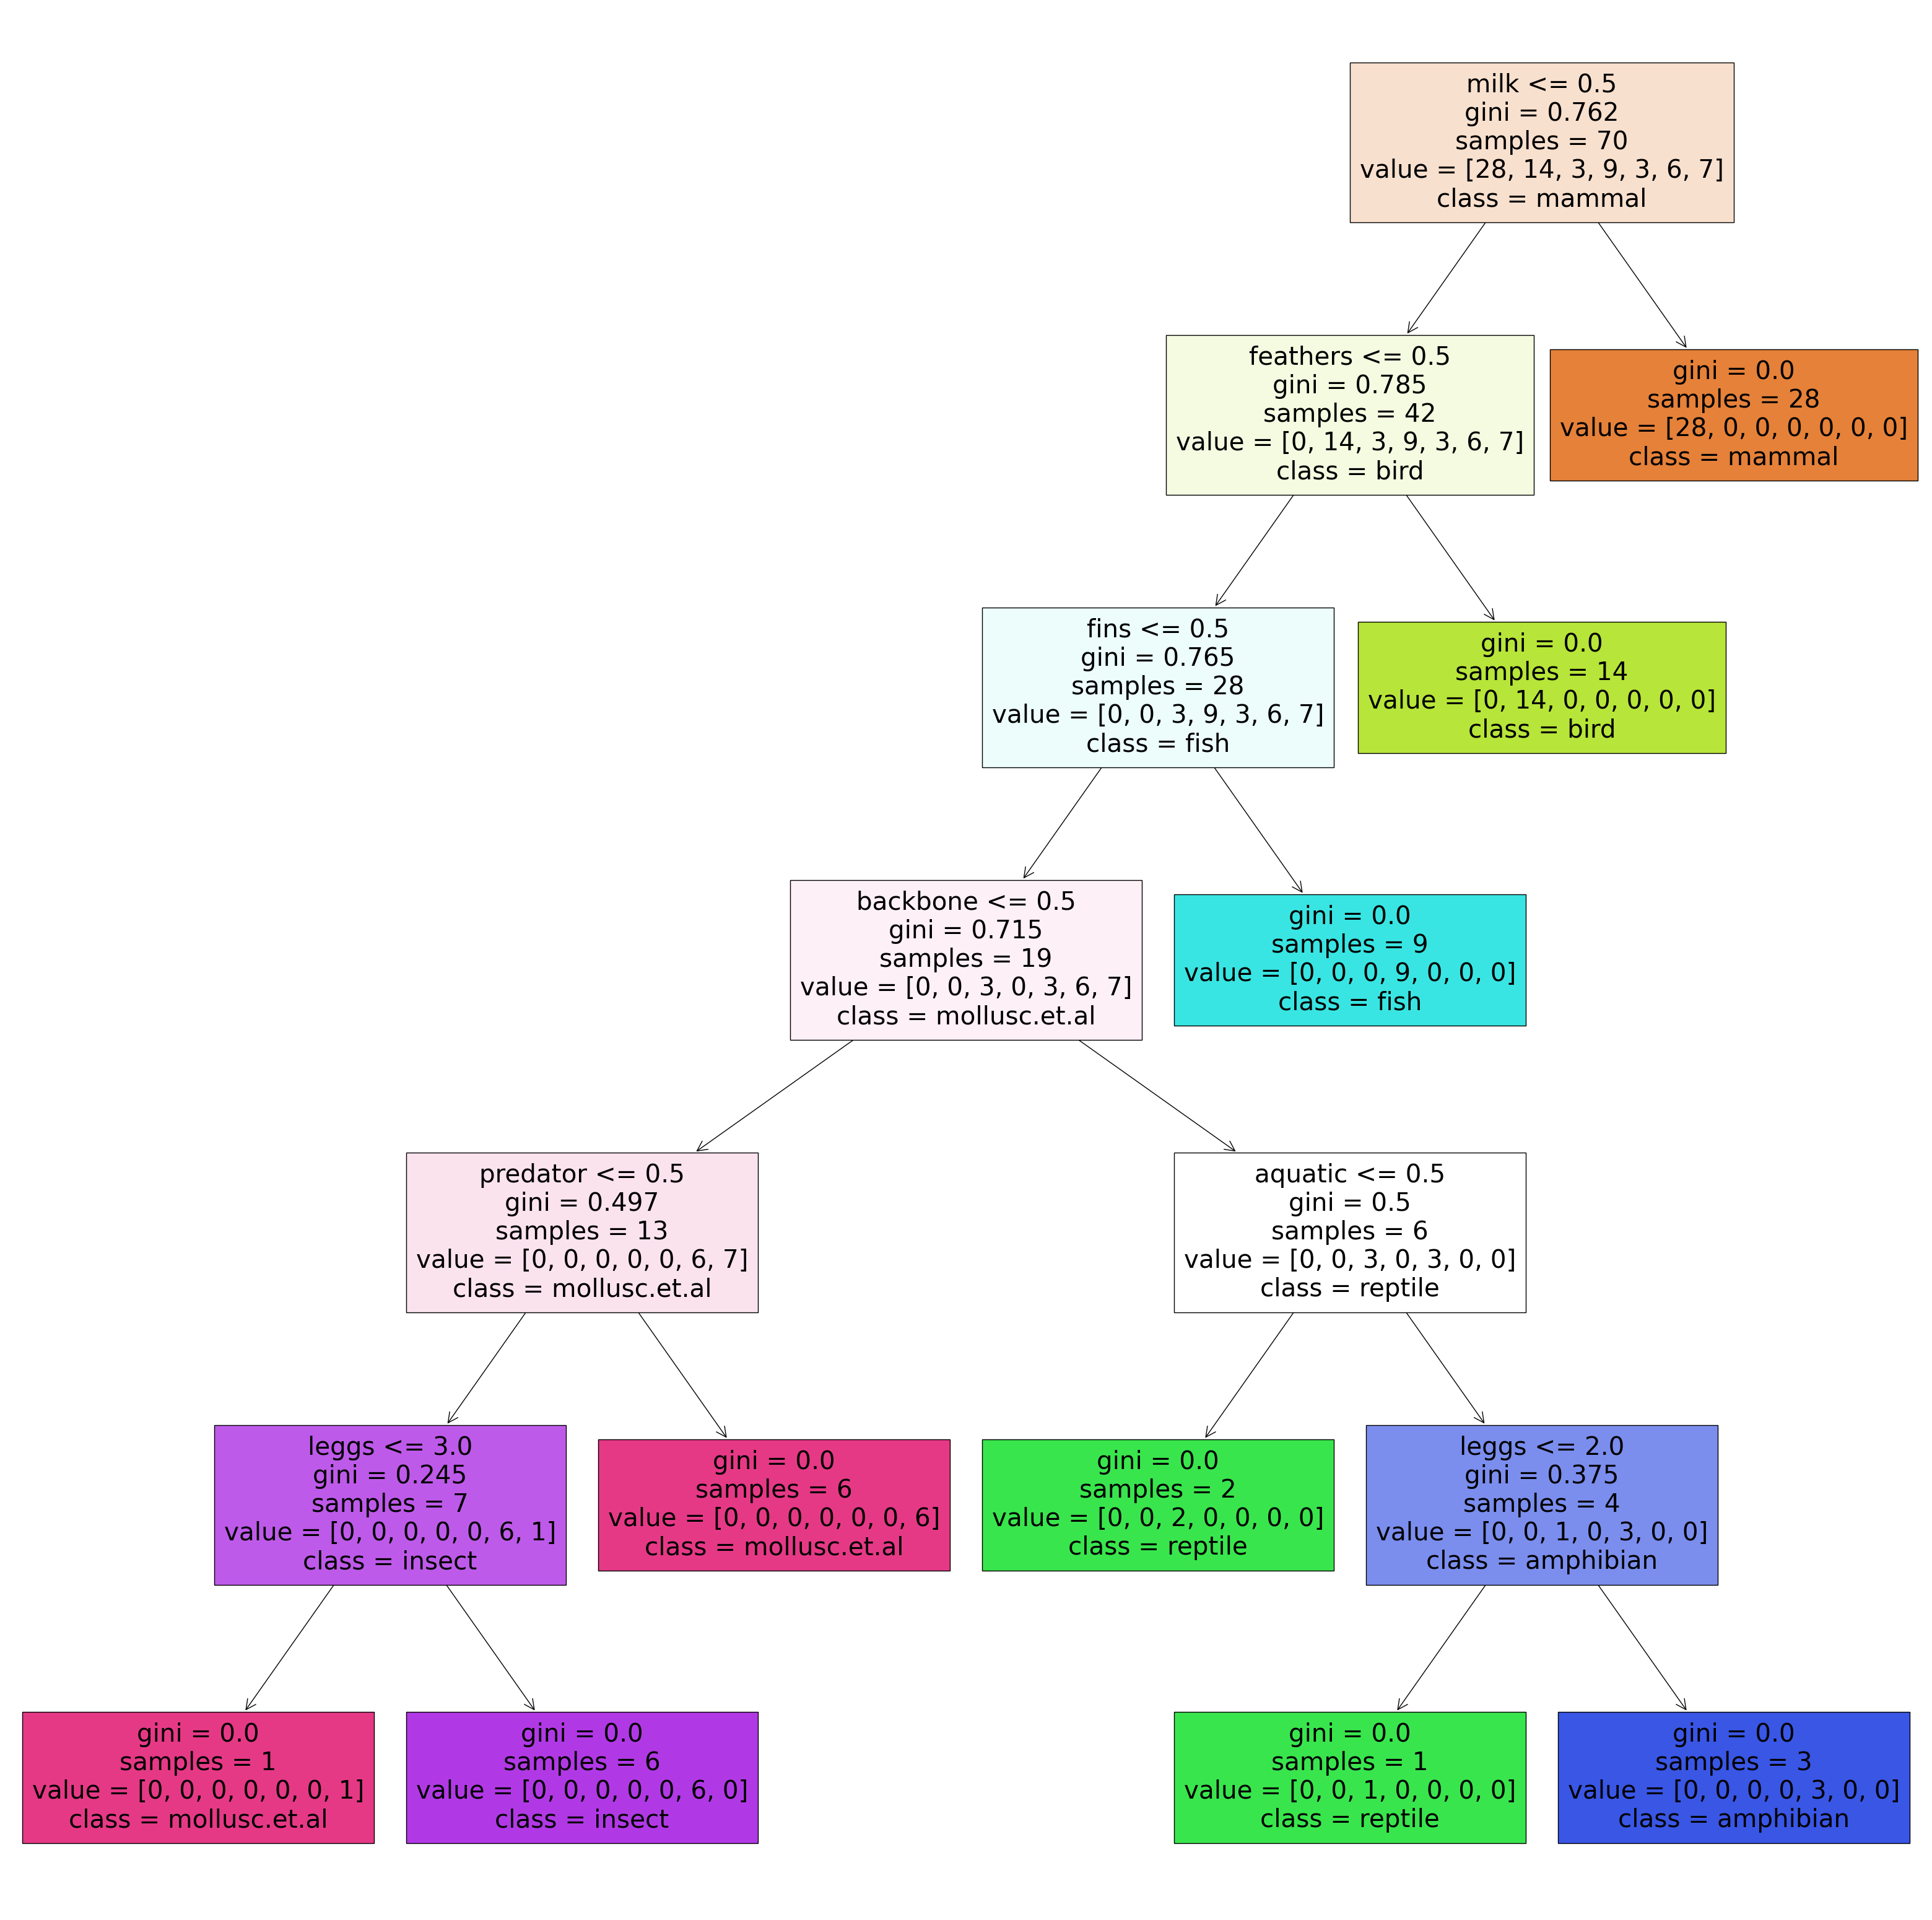

In [32]:
clf = DecisionTreeClassifier(min_samples_split = minsplit2, ccp_alpha = 0.011)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(40,40))
# demande d'afficher un graphique d'arbre de décision
    # donne en paramètres le nom de nos colonnes et pour la prédiction, 
    # le nom des deux classes qu'on peut prédire
plot_tree(clf, feature_names=df_zoo.columns.values, 
          class_names=name_classe,filled=True)
plt.show()

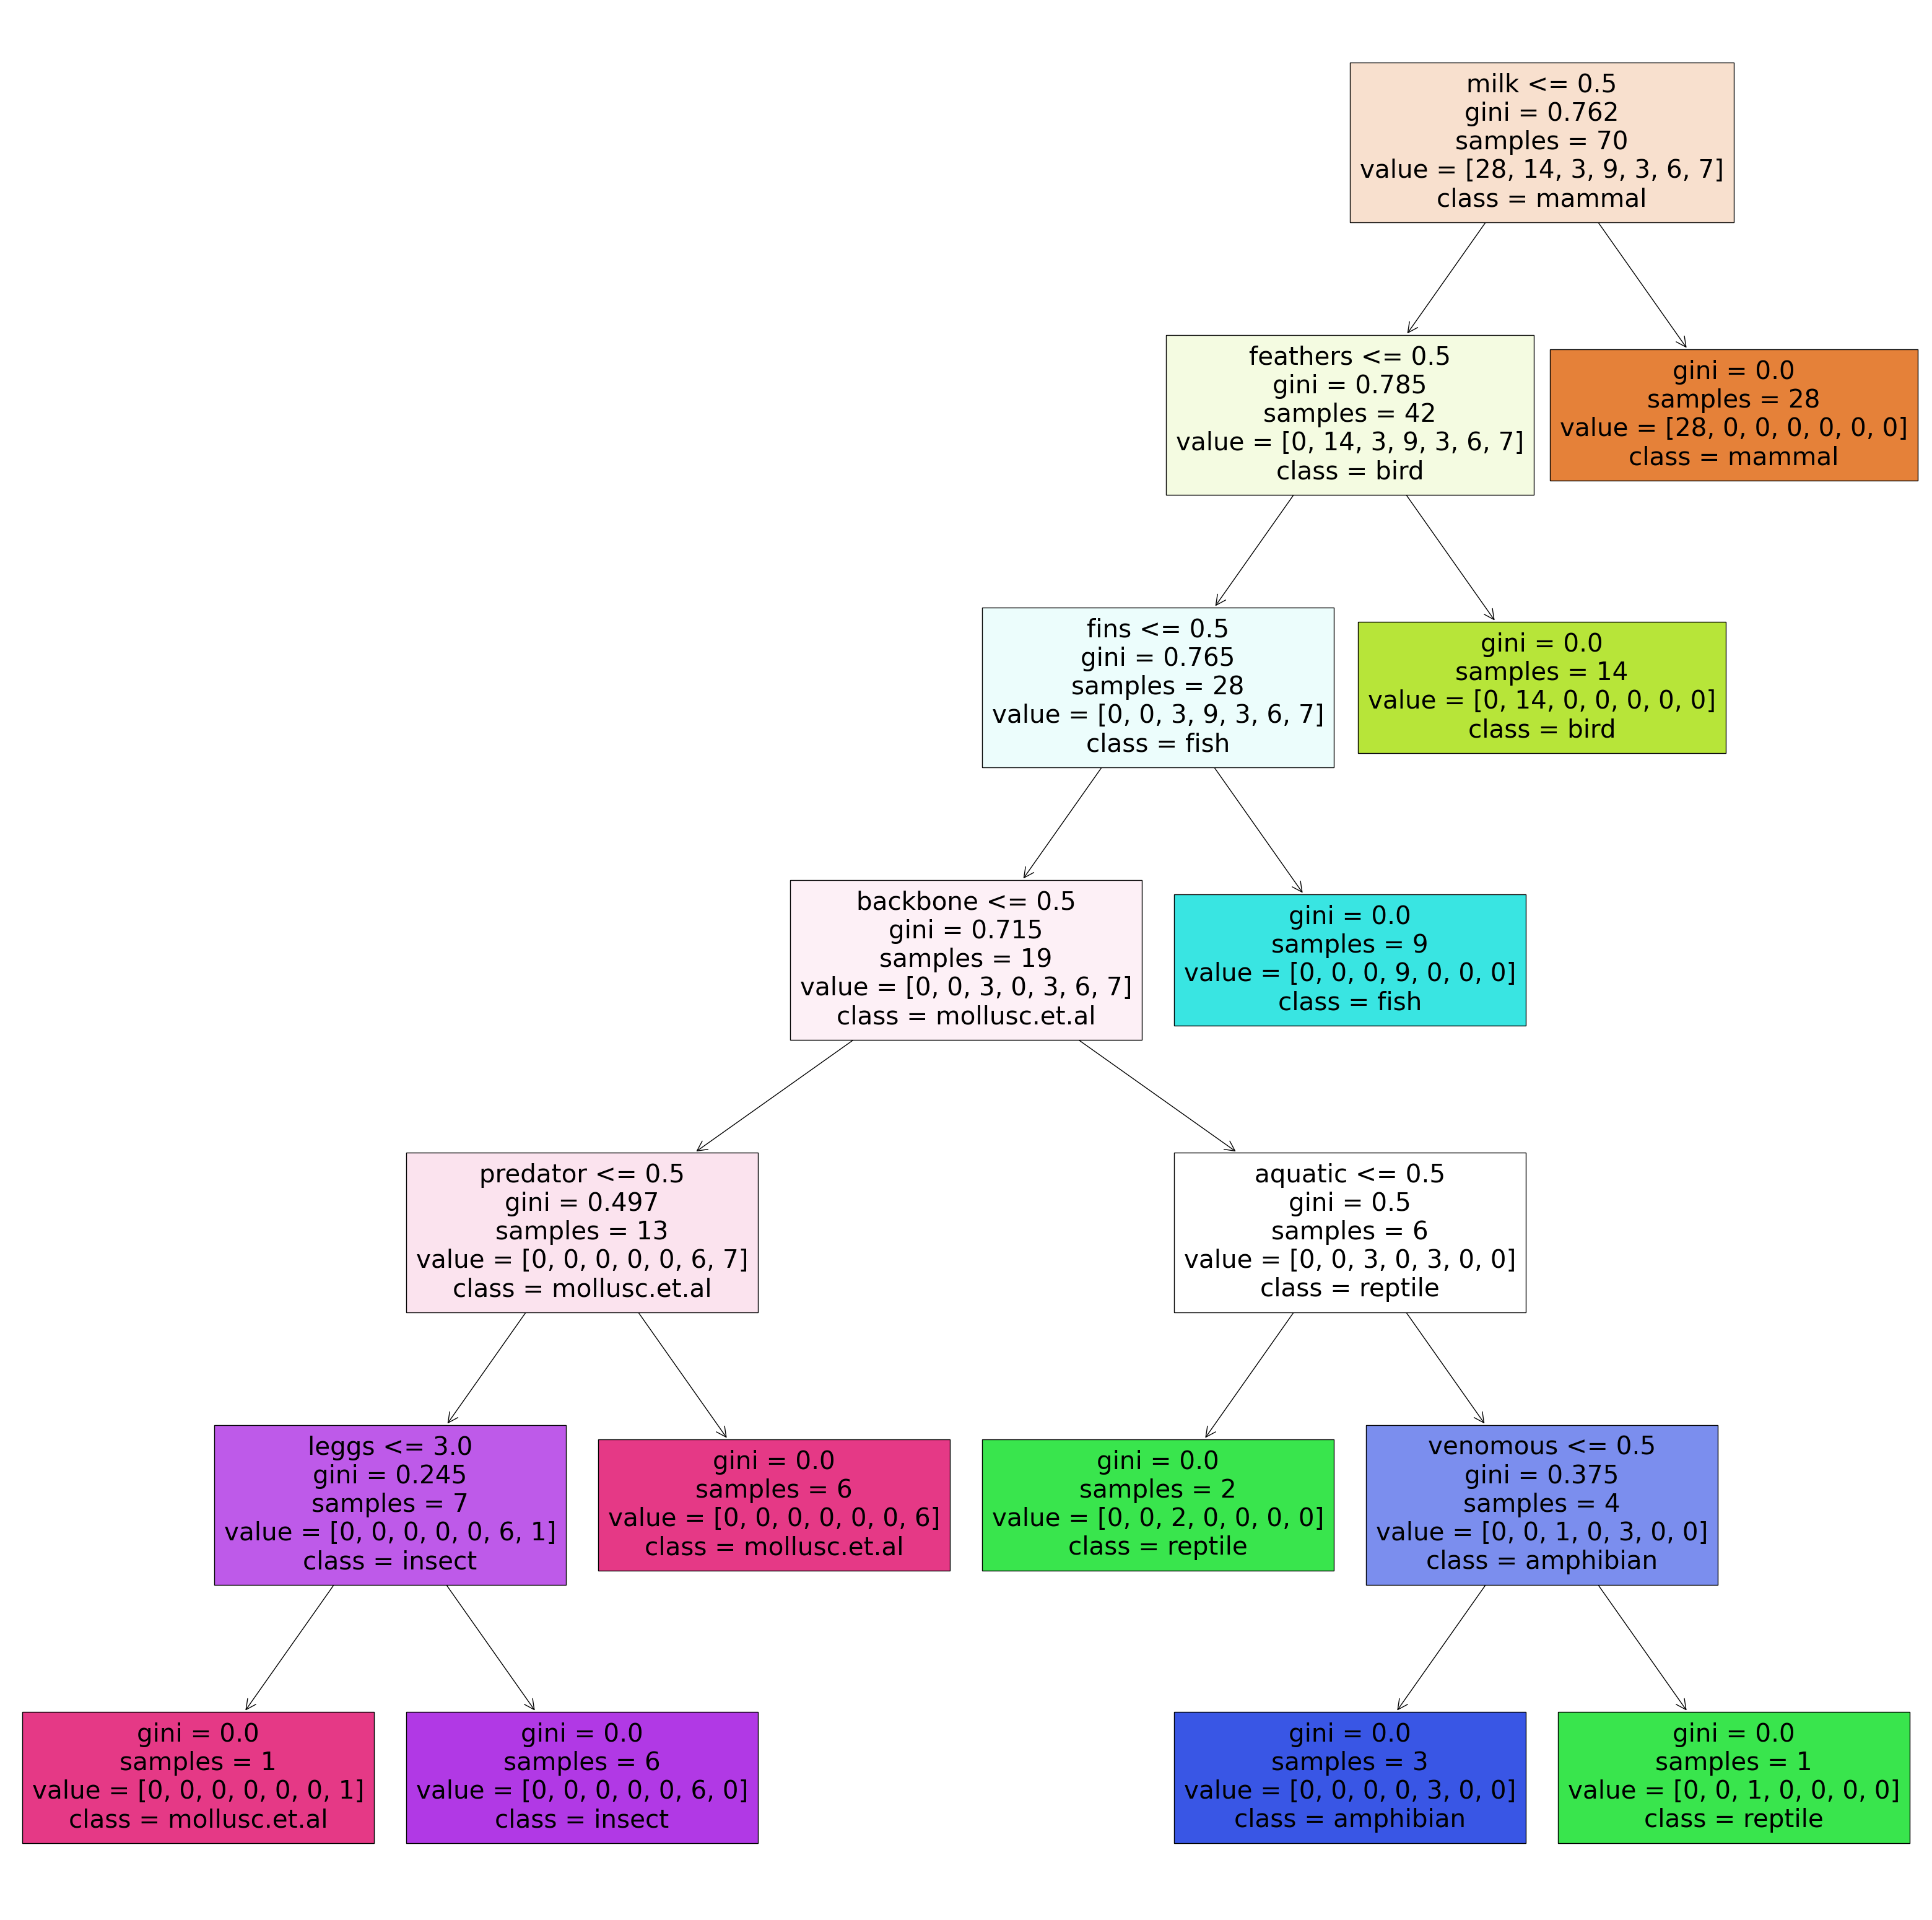

In [33]:
clf = DecisionTreeClassifier(min_samples_split = minsplit2, ccp_alpha = 0.019)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(40,40))
# demande d'afficher un graphique d'arbre de décision
    # donne en paramètres le nom de nos colonnes et pour la prédiction, 
    # le nom des deux classes qu'on peut prédire
plot_tree(clf, feature_names=df_zoo.columns.values, 
          class_names=name_classe,filled=True)
plt.show()

Il n'y a pas de grande différence entre ces abres. Les trois traitres de tous les types et ils ont la même profondeur. 